<a href="https://colab.research.google.com/github/STEM-tisch/TensorFlow-Lite/blob/master/1.Linear%20Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install tensorflow


In [0]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input

# Create a Basic Model in the form y = mx + c

In [0]:
x = [-1, 0, 1, 2, 3, 4]
y = [-3, -1, 1, 3, 5, 7]

In [6]:
model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Dense(units=1, input_shape=[1]))

model.compile(loss="mse", optimizer="sgd")

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


## Generate a SavedModel!

In [7]:
export_dir = "saved_model/1"

tf.saved_model.save(model, export_dir)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: saved_model/1/assets


# Conver the saved_model to TFLite model

In [0]:
converter = tf.lite.TFLiteConverter.from_saved_model(export_dir)
tflite_model = converter.convert()

In [9]:
import pathlib
tflite_model_file = pathlib.Path("model.tflite")
tflite_model_file.write_bytes(tflite_model)

516

## initialize TFLite Interpreter to test the model

In [0]:
interpreter = tf.lite.Interpreter(model_content=tflite_model)
interpreter.allocate_tensors()

In [0]:
# Get Input and Output details

input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [0]:
# Test the TensorFlow Lite model on random input data.

input_shape = input_details[0]["shape"]
inputs, outputs = [], []

for _ in range(100):

  input_data = np.array(np.random.random_sample(input_shape), dtype=np.float32)

  interpreter.set_tensor(input_details[0]["index"], input_data)

  interpreter.invoke()

  tflite_results = interpreter.get_tensor(output_details[0]["index"])

  tf_results = model(tf.constant(input_data))

  output_data = np.array(tf_results)

  inputs.append(input_data[0][0])
  outputs.append(output_data[0][0])

  

  

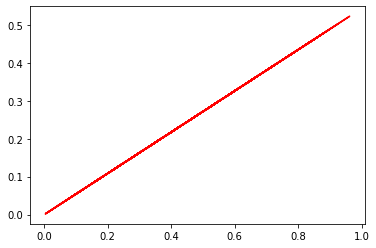

In [16]:
plt.plot(inputs, outputs, "r")
plt.show()

In [0]:
try:
  from google.colab import files
  file.download(tflite_model_file)
except:
  pass